# Finland Lake Laengelmaevesi Fish Catch

## Source: SAS Help Dataset
[Link to data](https://documentation.sas.com/?docsetId=statug&docsetTarget=statug_sashelp_sect012.htm&docsetVersion=15.1&locale=enLink)

Data contains 7 variables. They are as follows:

1. Species -- Seven types of fish caught in the lake.
2. Weight -- Weight of the fish in 
3. Length1 -- nose to beginning of the tail 
4. Length2 -- nose to the notch of the tail
5. Length3 -- nose to the end of the tail
6. Height -- Height of the fish
7. Width -- Width of the height

Note: Height and width are percentages of Length3.

In [62]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

## EDA

In [75]:
df = pd.read_excel('fish.xlsx')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [64]:
# One of these is a really heavy fish!
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,158.0,398.695570,359.086204,0.0000,120.00000,272.5000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [65]:
# Some heavy fish
df[df['Weight']>1000.00]

,Species,Weight,Length1,Length2,Length3,Height,Width
121,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [66]:
# Some long fish, some of which are also the heavy offenders above (obs 141-44).
df[df['Length3'] > 50.00]

,Species,Weight,Length1,Length2,Length3,Height,Width
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [67]:
# Count # species.
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

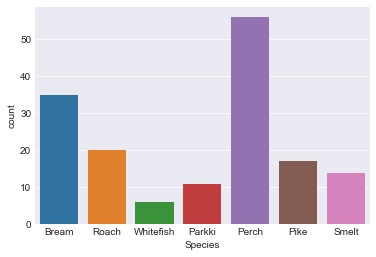

In [68]:
# Quick visualizations of counts.
sns.countplot(df['Species'])

Below is a pairplot of the quantitative variables colored by fish species. Note the degree of associations between them -- many are textbook linear or quadratic relationships. For the length variables this makes sense, as we should expect them to be highly correlated (unless we have mutant fish!)

![Three Eyed Mutant Fish](./mutantfish.jpg)

Note that the diagonal contains the distributions of the individual variables for each species, and most of these exhibit a high degree of overlap (with the exception of Smelt). 

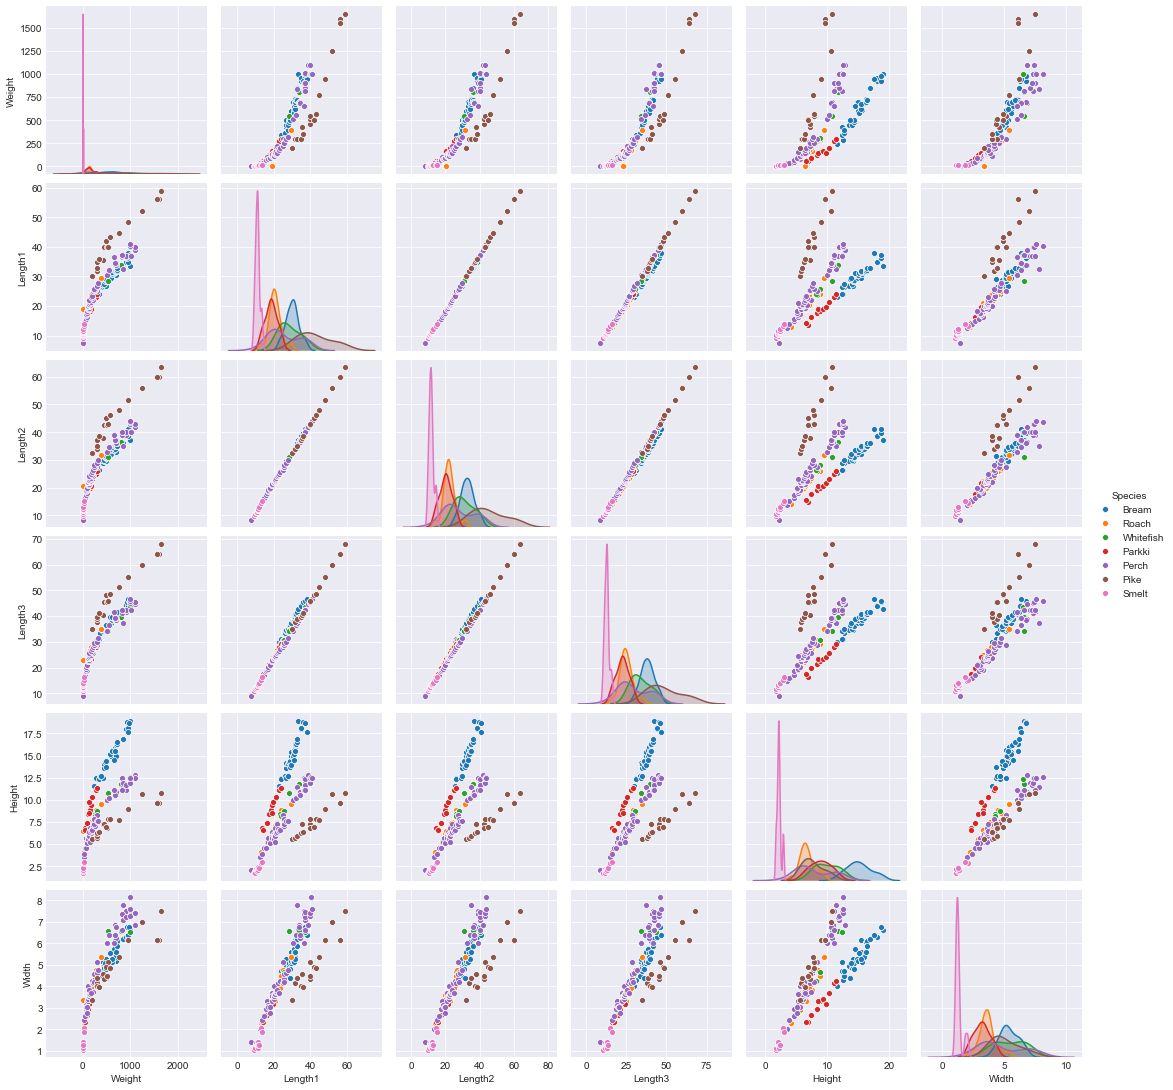

In [69]:
# Quick visualization of the data.
# Note the overwhelming associations between the variables.
sns.pairplot(df, hue='Species')

The correlations between the variables follow. Observe there is an extreme amount of multicollinearity.

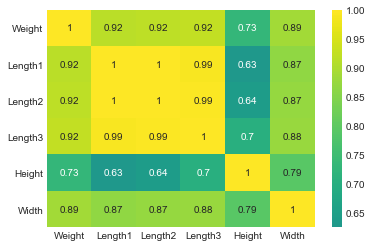

In [70]:
sns.heatmap(df.corr(), 
            cmap='viridis',
            center=.6,
            annot=True)

## Fit Model

Here we will split the data into train/test sets and try to predict Species based on physical characteristics. We will first try linear discriminant analysis, then quadratic, and finally a SVM using a pearson kernel. Note: No parameter tuning done here. 

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
# Instantiate scaler
scaler = MinMaxScaler()

# Separate into independent and dependent components.
y = df['Species']
X = df.drop(['Species'], axis=1)

# Scale data
scaler.fit(X)
X = scaler.transform(X)

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=404, test_size=0.3)

In [80]:
# Fit linear Discriminant Analysis object
LDA = LinearDiscriminantAnalysis()
LDA.fit(xtrain,ytrain)

# Make predictions
predsLDA = LDA.predict(xtest)

# Evaluate predictions
print(confusion_matrix(ytest,predsLDA))
print(classification_report(ytest, predsLDA))

# Not bad!

[[ 9  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  5  1  0  0]
 [ 0  0  0  0  6  0  1]
 [ 0  0  1  0  0  4  0]
 [ 0  0  0  0  1  0  1]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         9
      Parkki       1.00      1.00      1.00         1
       Perch       0.95      1.00      0.97        18
        Pike       1.00      0.83      0.91         6
       Roach       0.75      0.86      0.80         7
       Smelt       1.00      0.80      0.89         5
   Whitefish       0.50      0.50      0.50         2

    accuracy                           0.92        48
   macro avg       0.89      0.86      0.87        48
weighted avg       0.92      0.92      0.92        48



In [81]:
# Fit Quadratic Discriminant Analysis object
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(xtrain,ytrain)

# Make predictions
predsQDA = QDA.predict(xtest)

# Evaluate predictions
print(confusion_matrix(ytest,predsQDA))
print(classification_report(ytest, predsQDA))

# Also good! LDA slightly better, but the differences between the 
# two based off this one run does tell us much. Both could work equally well.

[[ 9  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  1  0  0  4  0]
 [ 0  0  1  0  1  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         9
      Parkki       1.00      1.00      1.00         1
       Perch       0.90      1.00      0.95        18
        Pike       1.00      1.00      1.00         6
       Roach       0.88      1.00      0.93         7
       Smelt       1.00      0.80      0.89         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.83      0.83      0.82        48
weighted avg       0.90      0.94      0.92        48



C:\Users\rfjos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\rfjos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# Fit SVM object with pearson kernel -- note no tuning.
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain)

# Make predictions
predssvc = svc.predict(xtest)

# Evaluate predictions
print(confusion_matrix(ytest,predssvc))
print(classification_report(ytest, predssvc))

# Not good! SVM with pearson kernel doesn't hold a candle to LDA or QDA here.
# Likely would perform better if steps were taken to tune the parameter C.
# Note most of the error is in misclassifying fish as Perch. This is could be 
# due to Perch being the most frequent fish in the test set.

[[ 9  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  2  4  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  1  0  0  4  0]
 [ 0  0  2  0  0  0  0]]
              precision    recall  f1-score   support

       Bream       0.90      1.00      0.95         9
      Parkki       0.00      0.00      0.00         1
       Perch       0.60      1.00      0.75        18
        Pike       1.00      0.67      0.80         6
       Roach       0.00      0.00      0.00         7
       Smelt       1.00      0.80      0.89         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.73        48
   macro avg       0.50      0.50      0.48        48
weighted avg       0.62      0.73      0.65        48



C:\Users\rfjos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Lets try refitting the SVM with the radial basis (Gaussian kernel).

# Fit SVM object with pearson kernel -- note no tuning.
svc = SVC(kernel='rbf')
svc.fit(xtrain,ytrain)

# Make predictions
predssvc = svc.predict(xtest)

# Evaluate predictions
print(confusion_matrix(ytest,predssvc))
print(classification_report(ytest, predssvc))

# Better! But still not as good as LDA/QDA.

[[ 9  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  2  0  0  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         9
      Parkki       1.00      1.00      1.00         1
       Perch       0.67      1.00      0.80        18
        Pike       1.00      1.00      1.00         6
       Roach       0.00      0.00      0.00         7
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.81        48
   macro avg       0.67      0.71      0.69        48
weighted avg       0.69      0.81      0.74        48



C:\Users\rfjos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
